Yunus Emre Bayraktar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
# Reading data
url='https://drive.google.com/file/d/1IVwl-f9iLzvuCl3JK4C5SYXDq5zSO3lX/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
rawdf = pd.read_csv(url)
rawdf.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# Checking for null values
print(rawdf.isna().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [4]:
# Checking if there is any inconsistency
rawdf.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


Here we can see that there are outliers in the data so we need to remove these outliers. To remove these outliers we defined the function below. This function calculates the Z-score of the values and if the Z-score is more than 3 standard deviations than it removes the value from dataset.

In [5]:
# Using self defined function to remove outliers.
def remove_outliers(df):
    std_deviations = 3
    
    constrains = df.select_dtypes(include = [np.number]) 
    constrains = constrains.apply(lambda x: np.abs(x - x.mean()) / x.std() < std_deviations).all(axis=1)

    return df.drop(df.index[~constrains])

rawdf = remove_outliers(rawdf)
rawdf

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


In [6]:
# Checking again for any inconsistency
rawdf.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,280293.0,27.880319,5.559384,12.08,23.91,27.12,31.01,47.37
PhysicalHealth,280293.0,1.438748,3.850877,0.00,0.00,0.00,0.00,27.00
MentalHealth,280293.0,2.212064,4.715502,0.00,0.00,0.00,2.00,27.00
SleepTime,280293.0,7.111954,1.171492,3.00,6.00,7.00,8.00,11.00


In order to use this data for classification models we first need to convert all the values to numeric. So we replace all non-numeric binary variables to numeric binary variable. In addition we consider age feature as ordinal variable and convert it to numeric variable as well.

In [7]:
# Here we filter the 'Diabetic' column
rawdf = rawdf[(rawdf["Diabetic"] == "No") | (rawdf["Diabetic"] == "Yes")]
df = rawdf

# Converting non-numeric variables to numeric variables
convert = {'No':0, 'Yes':1, 'Female':1, 'Male':0, 'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4,
           '18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
           '65-69':9, '70-74':10, '75-79':11, '80 or older':12}

df = df[df.columns].replace(convert)

There are categorical variables as well which we need to convert to numeric variables as well. So we use One-hot encoding and create dummy variables to convert these values.

In [8]:
# Creating dummy variables for 'Race' column
df = pd.get_dummies(df, columns=['Race'], drop_first=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,3,7.0,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,2,6.0,0,0,1,0,0,0,0,1
6,0,21.63,0,0,0,15.0,0.0,0,1,10,...,1,4.0,1,0,1,0,0,0,0,1
7,0,31.64,1,0,0,5.0,0.0,1,1,12,...,2,9.0,1,0,0,0,0,0,0,1
9,0,40.69,0,0,0,0.0,0.0,1,0,9,...,2,10.0,0,0,0,0,0,0,0,1


Feature selection is also needed before using the data in classification models. Here we plot a heatmap to see the corelation of the features.

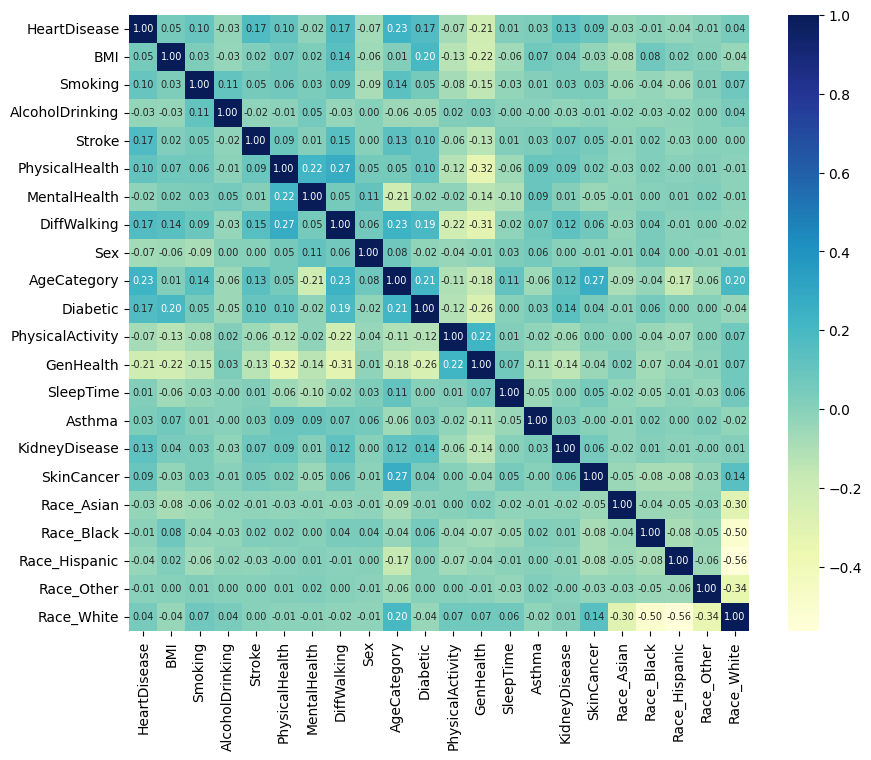

In [9]:
# Plotting heatmap of correlations.
plt.rcParams["figure.figsize"] = [10, 8]
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={'size': 7})
plt.show()

Here we see that there is a very low correlation between "HeartDisease" and "SleepTime". So we can remove "SleepTime" to save computing costs and better accuracy.

In [10]:
print(df.corr()["HeartDisease"])
df = df.drop(columns=["SleepTime"])

HeartDisease        1.000000
BMI                 0.048301
Smoking             0.098913
AlcoholDrinking    -0.030957
Stroke              0.172126
PhysicalHealth      0.104156
MentalHealth       -0.017584
DiffWalking         0.166853
Sex                -0.072430
AgeCategory         0.228633
Diabetic            0.169769
PhysicalActivity   -0.074705
GenHealth          -0.208810
SleepTime           0.011405
Asthma              0.027614
KidneyDisease       0.125226
SkinCancer          0.093095
Race_Asian         -0.027802
Race_Black         -0.010507
Race_Hispanic      -0.036303
Race_Other         -0.006178
Race_White          0.042090
Name: HeartDisease, dtype: float64


Now we use the first 10000 rows for scatter plots. With these plots we will analyze if the records labeled as disease form any clustering.

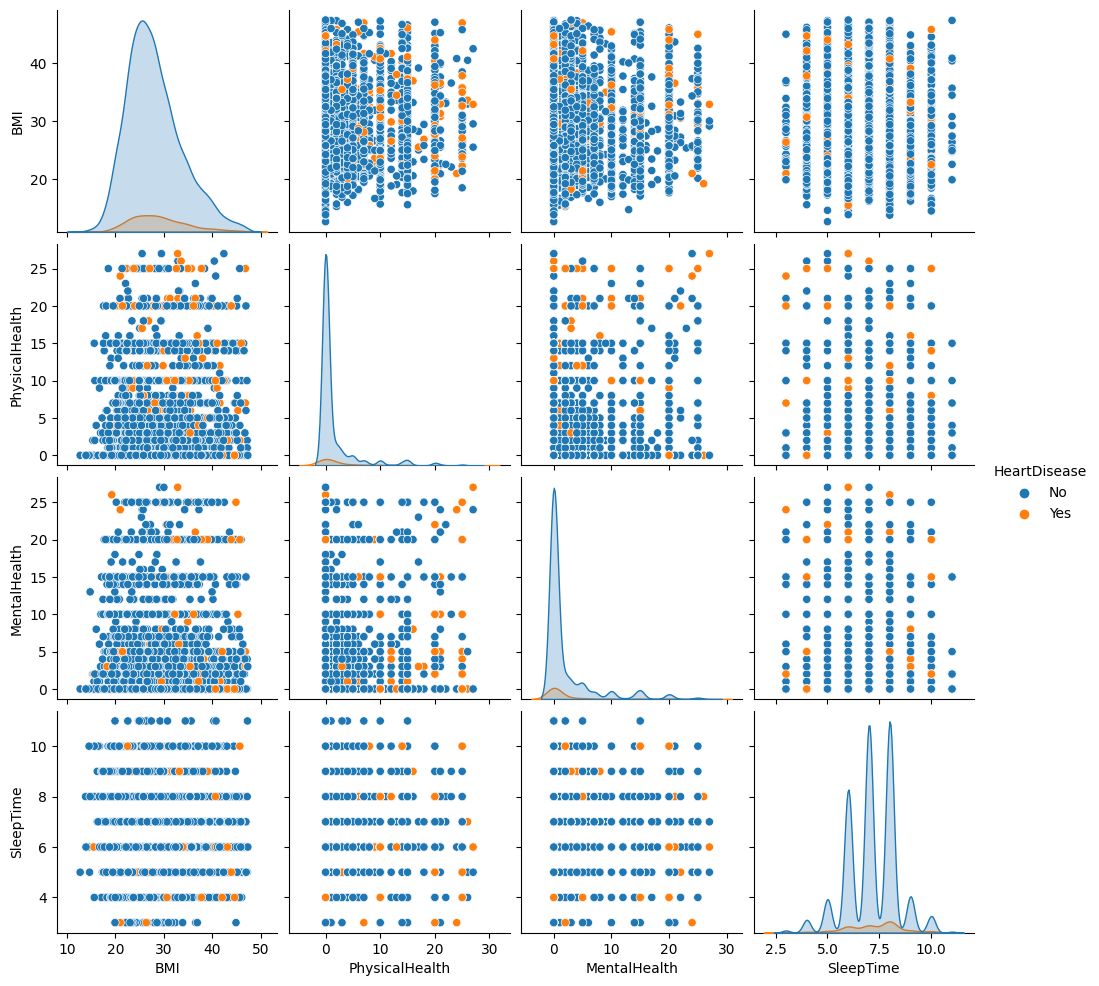

In [11]:
sns.pairplot(rawdf[0:10000], hue="HeartDisease")

These plots show us that in some parts of the data there are a slight clustering. However we are not observing any precise clustering.

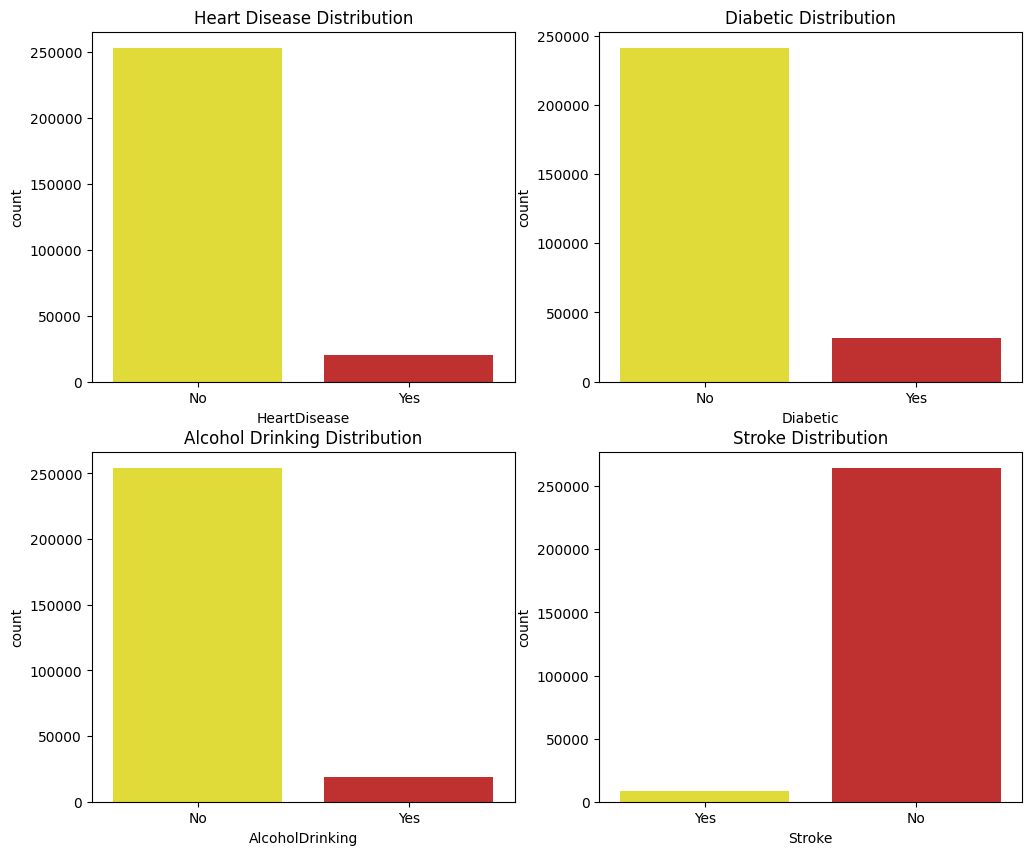

In [12]:
# Plotting the data to see the distributions
plt.rcParams["figure.figsize"] = [12, 10]
fig , axs = plt.subplots(2,2)

sns.countplot(data=rawdf, x='HeartDisease', ax=axs[0][0], palette=["#fcf51c", "#d61a1a"])
sns.countplot(data=rawdf, x='Diabetic', ax=axs[0][1], palette=["#fcf51c", "#d61a1a"])
sns.countplot(data=rawdf, x='AlcoholDrinking', ax=axs[1][0], palette=["#fcf51c", "#d61a1a"])
sns.countplot(data=rawdf, x='Stroke', ax=axs[1][1], palette=["#fcf51c", "#d61a1a"])

axs[0][0].set_title("Heart Disease Distribution")
axs[0][1].set_title("Diabetic Distribution")
axs[1][0].set_title("Alcohol Drinking Distribution")
axs[1][1].set_title("Stroke Distribution")

plt.show()

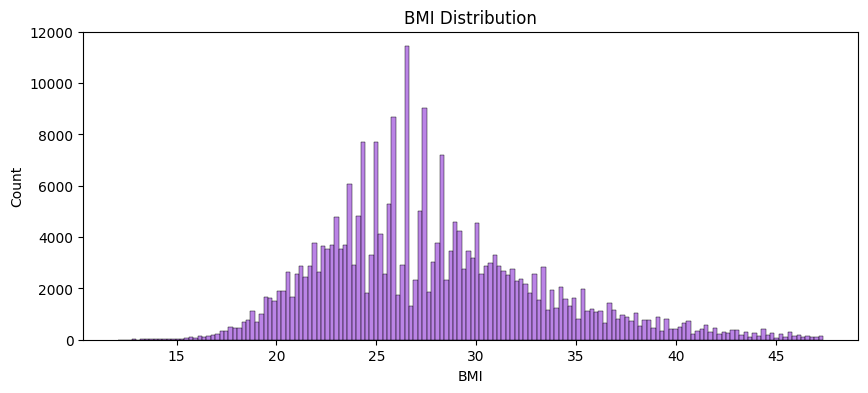

In [13]:
# Plotting BMI Distribution
plt.figure(figsize=(10,4))
sns.histplot(x=rawdf["BMI"], color="#a55bde")
plt.title("BMI Distribution")
plt.show()

BMI distribution is showing us a normal distribution as we expected.

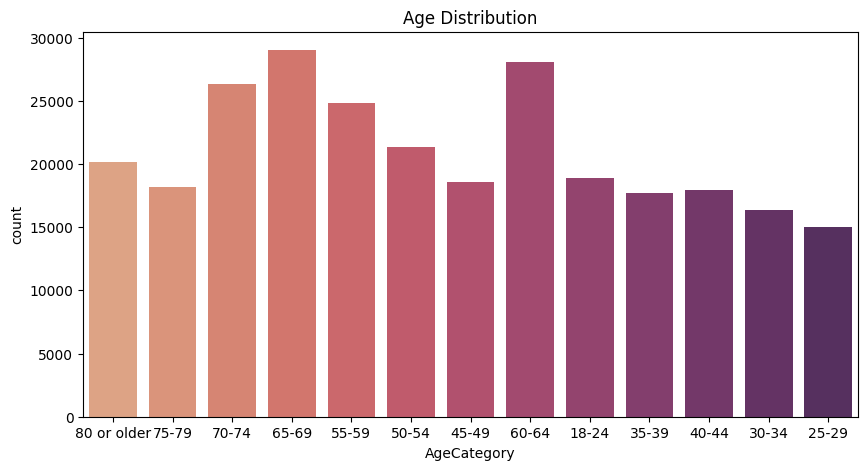

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=rawdf, x='AgeCategory', palette=sns.color_palette("flare", 13))
plt.title("Age Distribution")
plt.show()

Age distribution is good as well. There are enough samples from all age categories.

In the next step we will first shuffle the data and than divide it into 2 sets for training and testing. We are not using pre-defined train_test_split method. 

Our aim is to predict whether a person has a heart disease or not.

In [15]:
# Shuffling the data
dataLength = len(df)
df = df.iloc[np.random.permutation(dataLength)]

# Splitting the data into training and testing set with a ratio of 70:30 
trainingSet = df.iloc[ :int(dataLength*0.7), : ]
testingSet = df.iloc[int(dataLength*0.7): , : ]

Y_train = trainingSet["HeartDisease"]
X_train = trainingSet.drop(columns=["HeartDisease"])

Y_test = testingSet["HeartDisease"]
X_test = testingSet.drop(columns=["HeartDisease"])

To find the best k value for knn classifier we will calculate MSE for all k values from 1 to 13. Since the model works better with odd k values, we only pick the odd values in this range.

In [16]:
error = []

for k in range(1, 15, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    pred_y = knn.predict(X_test)
    error.append(mean_squared_error(Y_test, pred_y))
    print(f"For k = {k}, error rate is {error[(k-1)//2]}")

For k = 1, error rate is 0.11394279002618249
For k = 3, error rate is 0.08697726772212298
For k = 5, error rate is 0.0796486162429344
For k = 7, error rate is 0.07672449653754863
For k = 9, error rate is 0.075562189541684
For k = 11, error rate is 0.07468128318692344
For k = 13, error rate is 0.07435094330388822


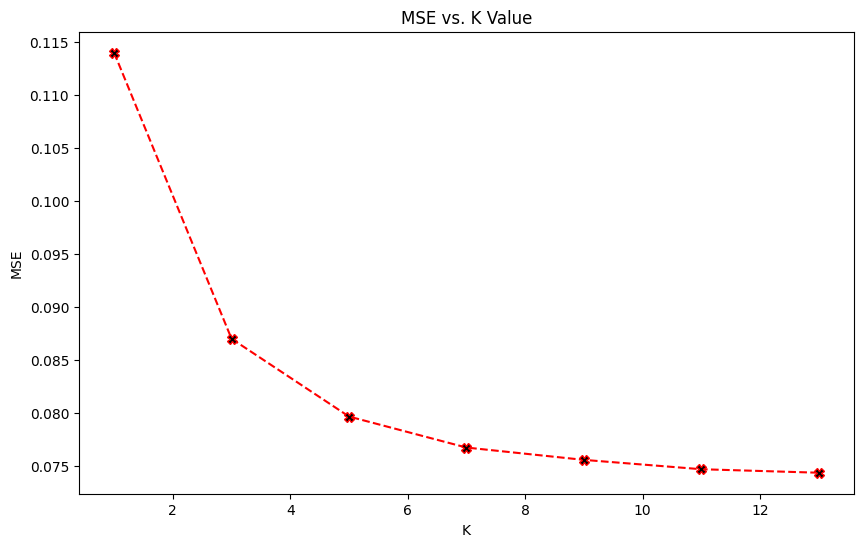

In [17]:
# Plotting MSE vs K values
plt.figure(figsize=(10,6))
plt.plot(range(1,15,2), error, color='r', linestyle='dashed', marker='X', markerfacecolor='black', markersize=7)
plt.title('MSE vs. K Value')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

From this table we can pick the best k value for our model but we should be careful with overfitting and underfitting. So we use elbow method to pick the optimal k value. The value we pick is 5.

Now we can use this k value to build our kNN classifier  model.

In [18]:
# Building kNN and logistic regression models
knn_reg = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(solver='liblinear')

To test the validation of these models we will perform a 10-Fold Cross Validation test for both models and compare the results.

In [19]:
# Calculating the performance of the models by using 10-Fold Cross Validation
knn_scores = cross_val_score(knn_reg, X_train, Y_train, cv=10)
log_scores = cross_val_score(log_reg, X_train, Y_train, cv=10)

scores = {"kNN":knn_scores, "logistic regression":log_scores}
score_table = pd.DataFrame.from_dict(scores).T
score_table['mean'] = score_table.mean(axis=1)
score_table

,0,1,2,3,4,5,6,7,8,9,mean
kNN,0.920512,0.920770,0.921714,0.919721,0.921766,0.919039,0.919826,0.920455,0.921399,0.922186,0.920739
logistic regression,0.927380,0.927953,0.927010,0.926800,0.927377,0.926328,0.927796,0.927744,0.927010,0.927272,0.927267


Now we will plot these results for better evaluation.

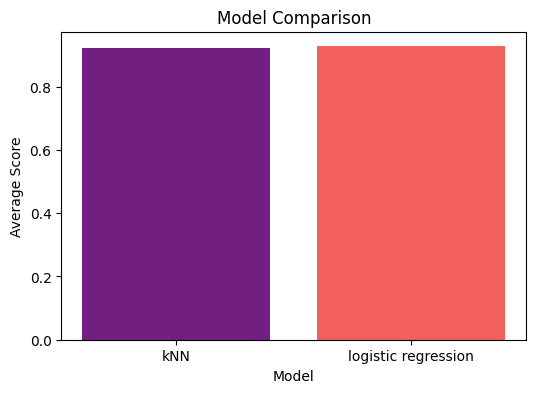

In [20]:
plt.rcParams["figure.figsize"] = [6, 4]
fig, ax = plt.subplots()
ax.bar(["kNN", "logistic regression"], [knn_scores.mean(), log_scores.mean()], color=sns.color_palette("magma", 2))
ax.set_title("Model Comparison")
ax.set_xlabel("Model")
ax.set_ylabel("Average Score")
plt.show()

This graph shows us that logistic regression is doing slightly better than kNN classifier.

Here we use the training data to fit the models.

In [21]:
# Fitting the models by using trainin data
knn_reg.fit(X_train, Y_train)
log_reg.fit(X_train, Y_train)

# Making predictions with the models by using test data
knn_pred = knn_reg.predict(X_test)
log_pred = log_reg.predict(X_test)

In this step we will evaluate our classification models based on various different evaluation metrics.

In [22]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrices
knn_matrix = confusion_matrix(knn_pred, Y_test)
log_matrix = confusion_matrix(log_pred, Y_test)

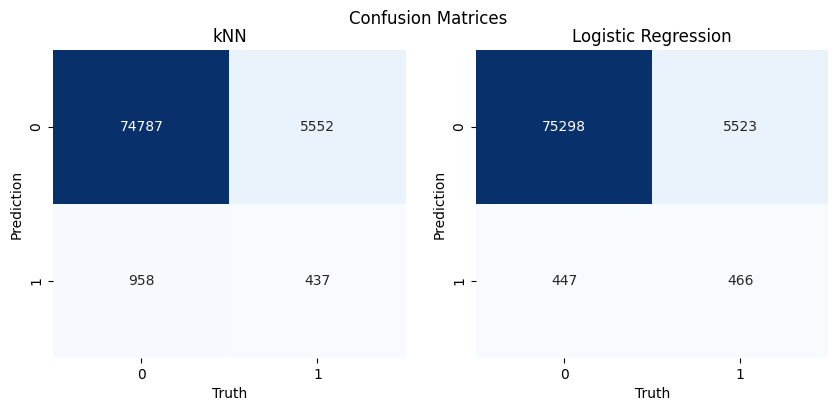

In [23]:
# Plotting confusion matrices
plt.rcParams["figure.figsize"] = [10, 4]
fig , (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Confusion Matrices")

sns.heatmap(knn_matrix, cmap="Blues", annot=True, cbar=False, ax=ax1, fmt='g')
ax1.set_title("kNN")
ax1.set_xlabel("Truth")
ax1.set_ylabel("Prediction")

sns.heatmap(log_matrix, cmap="Blues", annot=True, cbar=False, ax=ax2, fmt='g')
ax2.set_title("Logistic Regression")
ax2.set_xlabel("Truth")
ax2.set_ylabel("Prediction")

plt.show()

By using these Matrices we can calculate Accuracy, Error Rate, Presicion and Recall for both models.

We can see that both models produce too much false negative (FN) results.

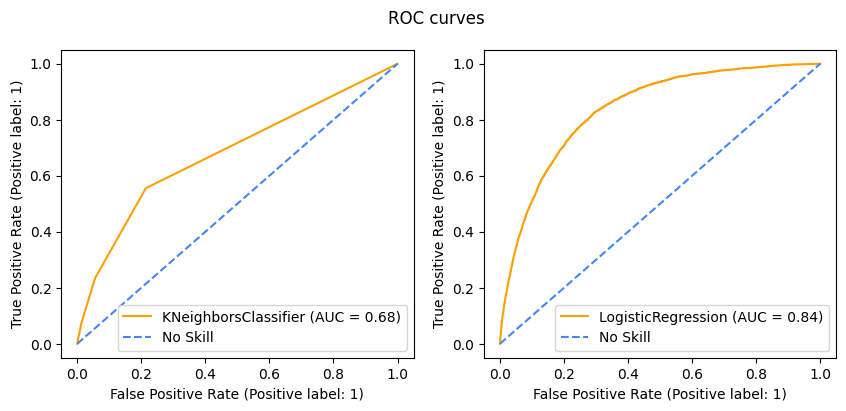

In [24]:
from sklearn.metrics import RocCurveDisplay

#Plotting Precision-Recall curves both for kNN Classifier and LogisticRegression
fig , (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("ROC curves")

RocCurveDisplay.from_estimator(knn_reg, X_test, Y_test, ax=ax1)
ax1.get_lines()[0].set_color("#fca103")
ax1.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
ax1.get_lines()[1].set_color("#4287f5")
ax1.legend()

RocCurveDisplay.from_estimator(log_reg, X_test, Y_test, ax=ax2)
ax2.get_lines()[0].set_color("#fca103")
ax2.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
ax2.get_lines()[1].set_color("#4287f5")
ax2.legend()

plt.show()

From these graphs we can see that both our models can perform better than random classification (blue line). Since the area under the ROC curve gives us the performance of the model we can say that logistic regression is performing better than knn classifier with an 0.84 AUC.

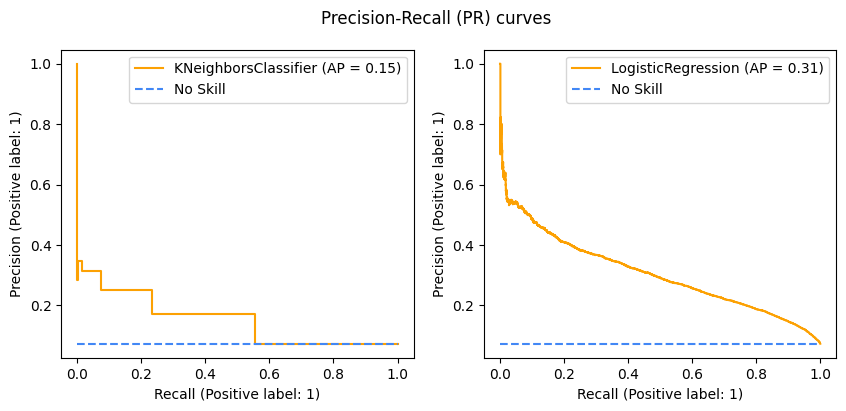

In [25]:
from sklearn.metrics import PrecisionRecallDisplay

#Plotting Precision-Recall curves both for kNN Classifier and LogisticRegression
fig , (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Precision-Recall (PR) curves")
no_skill = len(Y_test[Y_test==1]) / len(Y_test)

PrecisionRecallDisplay.from_estimator(knn_reg, X_test, Y_test, ax=ax1)
ax1.get_lines()[0].set_color("#fca103")
ax1.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax1.get_lines()[1].set_color("#4287f5")
ax1.legend()

PrecisionRecallDisplay.from_estimator(log_reg, X_test, Y_test, ax=ax2)
ax2.get_lines()[0].set_color("#fca103")
ax2.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax2.get_lines()[1].set_color("#4287f5")
ax2.legend()

plt.show()

From these graphs we can see that both our models can perform better than random classification (blue line). Since the area under the PR curve gives us the performance of the model we can say that logistic regression is performing better than knn classifier.

As conclusion we can say that both models are performing good to predict whether a person with given informations has a heart disease or not.